<class 'tuple'>
(52.3671947, 4.919245)


C:\Users\quent\AppData\Local\Temp\ipykernel_18788\2428811773.py:10: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(use_cache=True, log_console=True)


(3781170134, 55.4897645320106) (305081090, 99.7160621831038)
Node found.
Node found.


C:\Users\quent\AppData\Local\Temp\ipykernel_18788\2428811773.py:35: UserWarning: The `get_route_edge_attributes` function has been deprecated and will be removed in a future release. Use the `route_to_gdf` function instead.
  length = sum(ox.utils_graph.get_route_edge_attributes(canals, path, 'length'))


[3781170134, 323929882, 331854233, 8010136114, 252142901, 324827507, 305155548, 305155547, 305156166, 8003741421, 9407684484, 324128505, 324126395, 1195429031, 730950175, 277138134, 178261171, 60740843, 117738457, 154546029, 305084168, 305082709, 305081090]


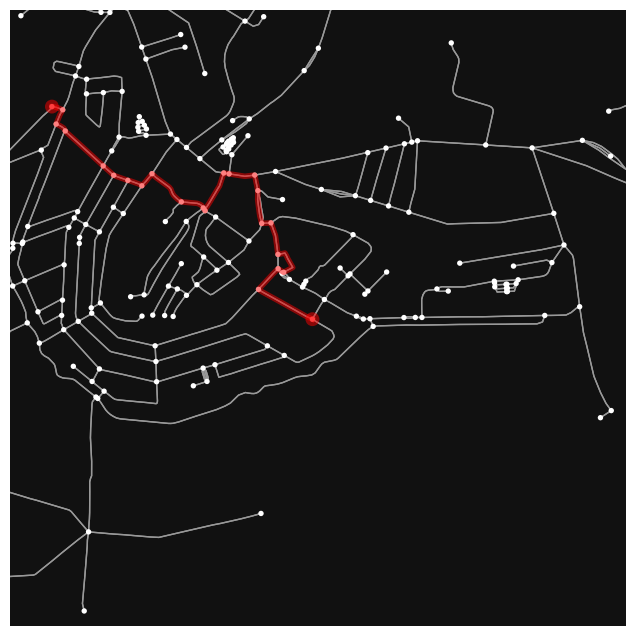

5004.24


C:\Users\quent\AppData\Local\Temp\ipykernel_18788\2428811773.py:46: UserWarning: The `get_route_edge_attributes` function has been deprecated and will be removed in a future release. Use the `route_to_gdf` function instead.
  lengths = ox.utils_graph.get_route_edge_attributes(canals, path, 'length')


In [62]:
import osmnx as ox
import networkx as nx

#Find coordinates of Artis
location_ARTIS = ox.geocode("Entrepotdok 86, Amsterdam, Netherlands")
print(type(location_ARTIS))
print(location_ARTIS)

#This gets all the canal data from Amsterdam
ox.config(use_cache=True, log_console=True)
canals = ox.graph_from_place('Amsterdam', retain_all=False, truncate_by_edge=False,
                        simplify=True, custom_filter='["waterway"~"canal"]')

#Zoom in with ARTIS as center
bbox = ox.utils_geo.bbox_from_point(location_ARTIS, dist=3000)
#fig, ax = ox.plot_graph(canals, bbox=bbox)

#Find the nearest nodes nearest node
nodes_ARTIS = ox.distance.nearest_nodes(canals, location_ARTIS[1], location_ARTIS[0], return_dist=True)
nodes_point2 = ox.distance.nearest_nodes(canals, 4.8798796664607105, 52.38623622216628, return_dist=True)
print(nodes_ARTIS, nodes_point2)

#Check if nodes exist
if nodes_ARTIS[0] in canals.nodes:
    print("Node found.")
if nodes_point2[0] in canals.nodes:
    print("Node found.")

#Shortest path between the two points
#path = ox.shortest_path(canals, nodes_ARTIS[0], nodes_point2[0])

L = 5000 #The route is 5000m long
path = ox.k_shortest_paths(canals, nodes_ARTIS[0], nodes_point2[0], 1000, 'length')
for i, path in enumerate(path):
    length = sum(ox.utils_graph.get_route_edge_attributes(canals, path, 'length'))
    if length >= L:
        break
i, length, path

#These are the nodes of the path
print(path)

pt = ox.graph_to_gdfs(canals, edges=False).unary_union.centroid
fig, ax = ox.plot_graph_route(canals, path, bbox=bbox)

lengths = ox.utils_graph.get_route_edge_attributes(canals, path, 'length')
path_length = sum(lengths)

#shortest_path = nx.shortest_path_length(canals, nodes_ARTIS[0], nodes_point2[0], weight='length')
#print(shortest_path)
print(path_length)